Predictive modelling using KNN on a classified dataset 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data and check the data

In [4]:
datadf=pd.read_csv("KNN_Project_Data.csv",index_col=None)

In [5]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
datadf.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


exploratory data analysis

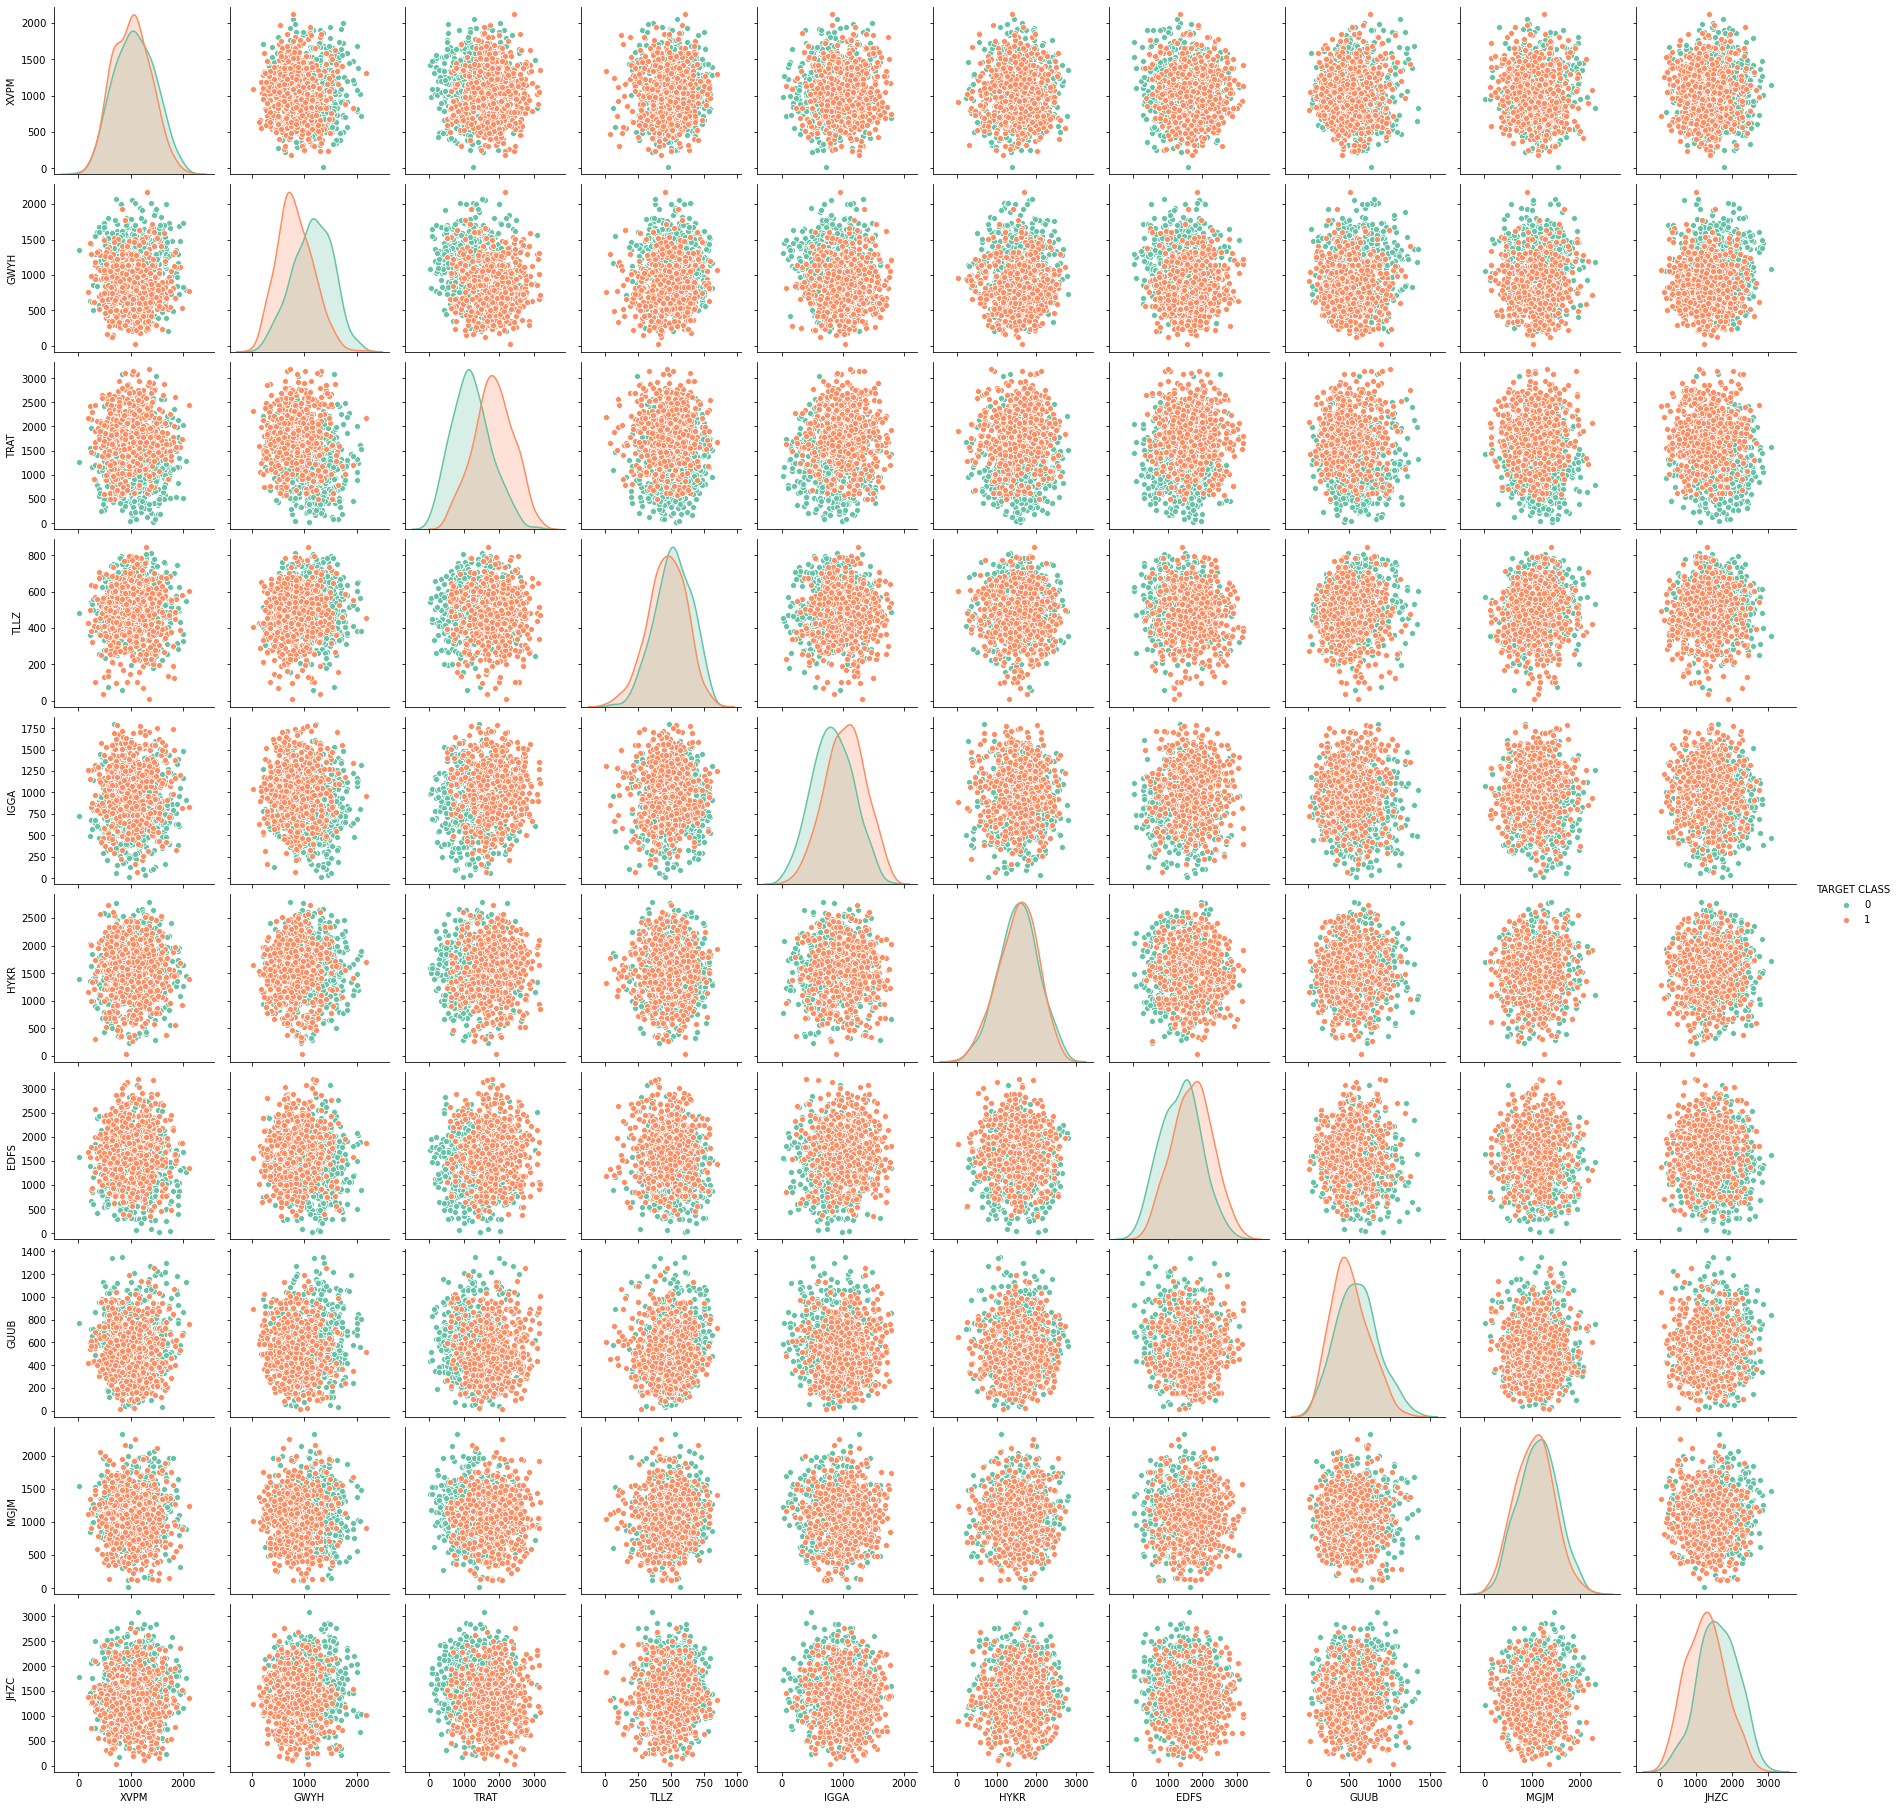

In [7]:
sns.pairplot(data=datadf,hue='TARGET CLASS',palette='Set2')

from  the above plot we can clearly see that the datapoints for the TARGET CLASS are clustered

Normalizing the numerical data using MinMax scale technique as KNN algothirm favours the feature having the highest scale

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scalermodel=MinMaxScaler()
scalermodel.fit(datadf.drop(labels='TARGET CLASS',axis=1))
normaliz2Darray=scalermodel.transform(datadf.drop(labels='TARGET CLASS',axis=1))
features_norm_df=pd.DataFrame(normaliz2Darray,columns=datadf.columns[:-1])

In [9]:
features_norm_df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.493313,0.451165,0.475692,0.581743,0.519788,0.550694,0.483257,0.409290,0.463862,0.464873
std,0.177009,0.182432,0.203382,0.170688,0.194879,0.178474,0.189191,0.184805,0.175241,0.185779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356061,0.313047,0.327425,0.470191,0.384680,0.430852,0.347700,0.275076,0.338865,0.336355
50%,0.488940,0.444889,0.473511,0.587828,0.519089,0.555887,0.484799,0.393656,0.468223,0.461286
75%,0.622615,0.583091,0.622365,0.707759,0.656114,0.674127,0.616231,0.532128,0.586091,0.599558
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we can see MIN MAX sclaler gives normalized output between (0,1)

Choosing optimal K using elbow method

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [19]:
features_train,features_test,label_train,label_test=train_test_split(features_norm_df,datadf['TARGET CLASS'],test_size=0.33,random_state=111)

Int64Index([190, 104, 295,  12,  87, 523, 825, 847, 194, 924,
            ...
            524, 228, 278, 195, 150, 715, 593, 134,  96,  24],
           dtype='int64', length=330)

In [25]:
error_rate_K=[]

for item in range(1,101):
    mymodel=KNeighborsClassifier(item)
    mymodel.fit(features_train,label_train)
    pred=mymodel.predict(features_test)
    error_rate_K.append(np.mean(label_test!=pred))
  

In [38]:
errorratedf=pd.DataFrame(data=error_rate_K,columns=['error_rate'])

def myfunc(obj):
    return obj+1

errorratedf.reset_index(inplace=True)
errorratedf['K']=errorratedf['index'].apply(myfunc)


In [40]:
from plotly.offline import download_plotlyjs,init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [46]:
errorratedf.iplot(kind='line',x='K',y='error_rate',yTitle='error_rate',xTitle='K',title='Elbow graph')

lowest stable error rate is occuring at K=62, so we build 62-NN model

In [42]:
mymodel=KNeighborsClassifier(62)
mymodel.fit(features_train,label_train)
pred=mymodel.predict(features_test)

In [43]:
print(metrics.classification_report(label_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       165
           1       0.81      0.87      0.84       165

    accuracy                           0.83       330
   macro avg       0.84      0.83      0.83       330
weighted avg       0.84      0.83      0.83       330



In [44]:
print(metrics.confusion_matrix(label_test,pred))

[[131  34]
 [ 21 144]]
